In [1]:
from pylmeasure import *
import matplotlib.pyplot as plt
from pprint import pprint as pp

In [2]:
# Define a list of one or more SWC files to analyze
swcFiles = ['tests/testFiles/HB130408-1NS_VB.swc', 'tests/testFiles/D00V00C00S00_3ptSoma.swc']

swcFile = swcFiles[0]

## Single Measure, Single File Example

Compute one measure of one SWC file

In [3]:
# Specify the L-Measures to compute (case-sensitive)
# Full list: http://cng.gmu.edu:8080/Lm/help/index.htm)
LMOutput = getOneMeasure('Surface', swcFile)

print("Surface area of first file:",  LMOutput["TotalSum"])

('Surface area of first file:', 49599.4)


In [4]:
LMOutput = getOneMeasure('Diameter', swcFile)

print("Mean diameter in first file:", LMOutput["Average"])

('Mean diameter in first file:', 1.46796)


In [5]:
LMOutput

{'Average': 1.46796,
 'CompartmentsConsidered': 11677.0,
 'CompartmentsDiscarded': 0.0,
 'Maximum': 4.748,
 'Minimum': 0.406,
 'StdDev': 0.728944,
 'TotalSum': 17141.4}

## Multiple Measures, Multiple Files Example

Compute a list of measures of multiple SWC files

In [6]:
LMOutput = getMeasure(['Surface', 'Diameter'], swcFiles)

#                                              V-- measure index           V-- file index
print("Surface area of first file:",  LMOutput[0]["WholeCellMeasuresDict"][0]["TotalSum"])
print("Mean diameter in first file:", LMOutput[1]["WholeCellMeasuresDict"][0]["Average"])

('Surface area of first file:', 49599.4)
('Mean diameter in first file:', 1.46796)


In [7]:
print("Surface area of 2nd file:",    LMOutput[0]["WholeCellMeasuresDict"][1]["TotalSum"])
print("Mean diameter in 2nd file:",   LMOutput[1]["WholeCellMeasuresDict"][1]["Average"])

('Surface area of 2nd file:', 41398.9)
('Mean diameter in 2nd file:', 1.34663)


In [8]:
print("Diameter stats of first file")
pp(LMOutput[1]["WholeCellMeasuresDict"][0])

Diameter stats of first file
{'Average': 1.46796,
 'CompartmentsConsidered': 11677.0,
 'CompartmentsDiscarded': 0.0,
 'Maximum': 4.748,
 'Minimum': 0.406,
 'StdDev': 0.728944,
 'TotalSum': 17141.4}


# Distribution Example

This example computes the distribution of a measure

In [9]:
LMOutput = getMeasureDistribution(['Diameter', "Daughter_Ratio"], swcFiles, nBins=21)

file = 0
plt.bar(LMOutput[0]['measure1BinCentres'][file], LMOutput[0]['measure1BinCounts'][file])
plt.title("File 1 Diameter Distribution")
plt.show(block=False)

plt.bar(LMOutput[1]['measure1BinCentres'][file], LMOutput[1]['measure1BinCounts'][file])
plt.title("File 1 Daughter Ratio Distribution")
plt.show(block=False)

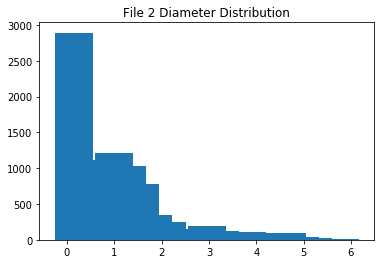

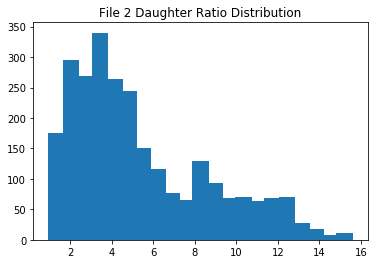

In [10]:
file = 1
plt.bar(LMOutput[0]['measure1BinCentres'][file], LMOutput[0]['measure1BinCounts'][file])
plt.title("File 2 Diameter Distribution")
plt.show(block=False)

plt.bar(LMOutput[1]['measure1BinCentres'][file], LMOutput[1]['measure1BinCounts'][file])
plt.title("File 2 Daughter Ratio Distribution")
plt.show(block=False)

# One measure vs another (bin sums)

Compute the dependence of one measure on another

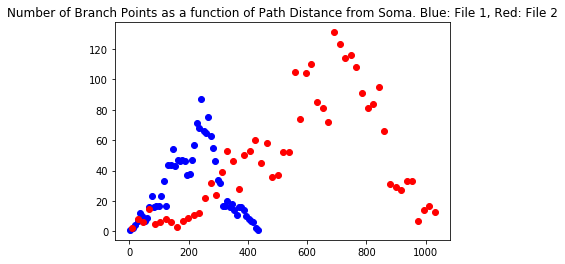

In [11]:
LMOutput = getMeasureDependence(['N_bifs'], ['PathDistance'], swcFiles, nBins=55, average=False)

plt.plot(LMOutput[0]['measure1BinCentres'][0], LMOutput[0]['measure2BinSums'][0], 'bo')
plt.plot(LMOutput[0]['measure1BinCentres'][1], LMOutput[0]['measure2BinSums'][1], 'ro')
plt.title("Number of Branch Points as a function of Path Distance from Soma. Blue: File 1, Red: File 2")
plt.show(block=False)

# One measure vs another (bin means + stdevs)

Compute the dependence of one measure on another

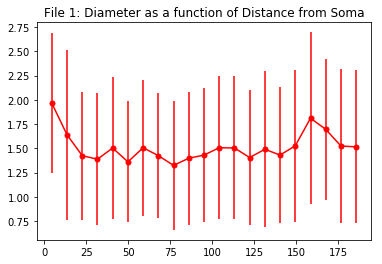

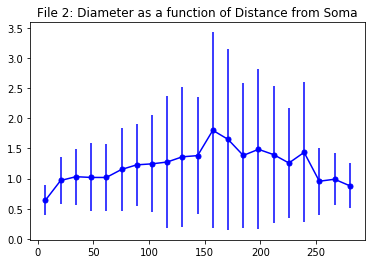

In [12]:
LMOutput = getMeasureDependence(['Diameter'], ['EucDistance'], swcFiles, nBins=21, average=True)
plt.figure()
plt.errorbar(LMOutput[0]['measure1BinCentres'][0],
             LMOutput[0]['measure2BinAverages'][0],
             LMOutput[0]['measure2BinStdDevs'][0],
                color='r', ls='-', marker='o', ms=5, mfc='r')
plt.title("File 1: Diameter as a function of Distance from Soma")
plt.draw()
plt.show(block=False)


plt.figure()
plt.errorbar(LMOutput[0]['measure1BinCentres'][1],
             LMOutput[0]['measure2BinAverages'][1],
             LMOutput[0]['measure2BinStdDevs'][1],
                color='b', ls='-', marker='o', ms=5, mfc='b')
plt.title("File 2: Diameter as a function of Distance from Soma")
plt.draw()
plt.show(block=False)

# Filtering segments before computing metrics (e.g. "specificity panel")

You can specify one or more filters for L-Measure to use before performing computations (see the [Specificity panel documentation](http://cng.gmu.edu:8080/Lm/help/index.htm))

The filters can be passed into any of the above getXYZ... functions.

For a single condition, the format is:

`[L-Measure Function] [>|<|==] [number]`
   
For multiple conditions (as many as needed):

`[L-Measure Function] [>|<|==] [number] [and|or] [L-Measure Function] [>|<|==] [number]`

In [13]:
# Compute the diameter statistics of the soma (in LMeasure, soma elements have Type=1)
LMOutput = getOneMeasure('Diameter', swcFile, specificity="Type == 1")
LMOutput

{'Average': 2.34,
 'CompartmentsConsidered': 3.0,
 'CompartmentsDiscarded': 11674.0,
 'Maximum': 2.34,
 'Minimum': 2.34,
 'StdDev': 0.0,
 'TotalSum': 7.02}

In [14]:
# Compute the diameter statistics of non-soma compartments
LMOutput = getOneMeasure('Diameter', swcFile, specificity="Type > 1")
LMOutput

{'Average': 1.46774,
 'CompartmentsConsidered': 11674.0,
 'CompartmentsDiscarded': 3.0,
 'Maximum': 4.748,
 'Minimum': 0.406,
 'StdDev': 0.728892,
 'TotalSum': 17134.4}

In [15]:
# Multiple conditions can be specified too. Below is a filter for non-soma compartments, less than 100 um away
LMOutput = getOneMeasure('Diameter', swcFile, specificity="Type > 1 and EucDistance < 100")
LMOutput

{'Average': 1.42768,
 'CompartmentsConsidered': 4699.0,
 'CompartmentsDiscarded': 6978.0,
 'Maximum': 4.582,
 'Minimum': 0.406,
 'StdDev': 0.684917,
 'TotalSum': 6708.66}

# PCA or "rotate upright"

Before computing Height, Depth, and Width measures, [L-Measure documentation](http://cng.gmu.edu:8080/Lm/help/Width.htm) recommends orienting the cell points along the principal components. Usually this means ~"standing the cell upright".

To perform the rotation, pass the `PCA=True` parameter into any of the above getXYZ... functions.

In [16]:
# Compute the Height statistics after orienting the cell along the point principal components
LMOutput = getOneMeasure('Height', swcFile, PCA=True)
LMOutput

{'Average': 137.453,
 'CompartmentsConsidered': 11677.0,
 'CompartmentsDiscarded': 0.0,
 'Maximum': 137.453,
 'Minimum': 137.453,
 'StdDev': 0.0,
 'TotalSum': 137.453}